# Machine Learning with the Fasion-MNIST dataset

### Loading the data
For loading the data, I've downloaded the GitHub repository from https://github.com/zalandoresearch/fashion-mnist. This repository contains the data and a tool for reading the data (the mnist_reader).

The data is already split into a train and a test set by default. The training set contains 60.000 samples and the test set contains 10.000 samples.

In [17]:
from fashionmnistmaster.utils import mnist_reader

X_train, y_train = mnist_reader.load_mnist('fashionmnistmaster/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashionmnistmaster/data/fashion', kind='t10k')
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


## Random Forest Classifier

### Training on the full training set and time how long it takes

In [55]:
from sklearn.ensemble import RandomForestClassifier
import time

start_time = time.time()

classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 6.431481838226318 seconds ---


### Validating the model

In [56]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

classifier.score(X_test, y_test)
#average_precision = average_precision_score(y_test, y_pred, average="micro")
#print('Average precision-recall score: {0:0.2f}'.format(
      #average_precision))
# Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

0.8529

In [20]:
# from sklearn import metrics
# import pandas as pd
# import numpy as np

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Reducing the dimensions using PCA

The assignment asked for an explained_variance_ratio of 95%, so I've tested on multiple n_components values to get it around the 95% value. It resulted in an n_components value of 190, reducing the number of dimensions from 784 to 190.

In [21]:
from sklearn.decomposition import PCA

n_components = 190
start_time = time.time()

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print("--- %s seconds ---" % (time.time() - start_time))

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

pca.explained_variance_ratio_.sum()

--- 4.565580606460571 seconds ---
(60000, 190) (10000, 190)


0.9503487288220573

### Training on the dataset with reduced dimensions

In [58]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train_pca, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 8.448500633239746 seconds ---


As we can see it reduces training time by ....

### Evaluating the model trained with reduced dimensions

In [59]:
classifier.score(X_test_pca, y_test)

0.8176

### Comparison of using the full dataset vs the dataset with reduced dimensions

We can conclude that it's alot faster to train the dataset with fewer dimensions, but this trades in a small amoount of accuracy in the score of the model.

## Softmax Regression

The Softmax Regression algorithm we will use is the Scikit-learn LogisticRegression model with the multiclass property set to true. We will use this model on both the original dataset and the dataset with reduced dimensions. After doing so we will compare the speed and scores of both models.

### The original dataset

First we will train a Softmax Regression model on the original dataset and time how long it takes to learn it. 

In [24]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

softmaxRegression = LogisticRegression(random_state=0, solver='lbfgs',
                                      multi_class='multinomial').fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

softmaxRegression.score(X_test, y_test)

--- 11.701823949813843 seconds ---


C:\Users\Rikva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8412

### The dataset with reduced dimensions

Now we will train a Softmax Regression model on the dataset with reduced dimensions.

In [25]:
start_time = time.time()

softmaxRegression = LogisticRegression(random_state=0, solver='lbfgs',
                                      multi_class='multinomial').fit(X_train_pca, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

softmaxRegression.score(X_test_pca, y_test)

--- 4.502256393432617 seconds ---


C:\Users\Rikva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8435

## Visualization

### Reducing to a 2 dimensional dataset using t-SNE

We have to use dimensionality on a subset of 12.500 images, therefore we split the training set into 2 sets using sklearn's test_train_split library.

In [48]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Subset 2 is the subset with 12.500 images (12.500 is 20,833% of 60.000)
SubsetX_1, SubsetX_2, SubsetY_1, SubsetY_2 = train_test_split(
    X_train, y_train, test_size=0.20833, random_state=5)

print(SubsetX_2.shape)

SubsetX_2_tSNE = TSNE(n_components=2).fit_transform(SubsetX_2)

SubsetX_2_tSNE.shape

(12500, 784)


(12500, 2)

In [49]:
SubsetX_2_tSNE.shape
SubsetY_2.shape

(12500,)

In [50]:
SubsetX_2_tSNE[:,0].shape

(12500,)

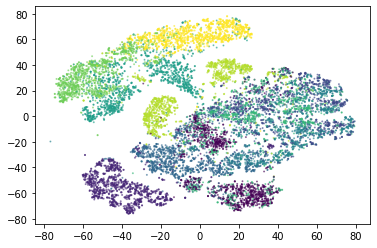

In [51]:
from matplotlib import pyplot

area = (30 * np.random.rand(12500))**2


pyplot.scatter(SubsetX_2_tSNE[:,0], SubsetX_2_tSNE[:,1], alpha=0.5, s=1, c=SubsetY_2)
pyplot.show()
# sneaker=7
# bag=8
# tshirt=0